In [38]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,  QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier



#Metrics
from sklearn.metrics import accuracy_score


names=[
    'poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]


mushrooms_path = 'data/agaricus-lepiota.csv'

df_mushrooms = pd.read_csv(mushrooms_path, header=None)
df_mushrooms.columns= names
df_mushrooms.drop(columns=['stalk-root'], inplace=True)
print(df_mushrooms)

     poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            p         x           s         n       t    p               f   
1            e         x           s         y       t    a               f   
2            e         b           s         w       t    l               f   
3            p         x           y         w       t    p               f   
4            e         x           s         g       f    n               f   
...        ...       ...         ...       ...     ...  ...             ...   
8119         e         k           s         n       f    n               a   
8120         e         x           s         n       f    n               a   
8121         e         f           s         n       f    n               a   
8122         p         k           y         n       f    y               f   
8123         e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-s

In [40]:
encoded_df = pd.read_csv(mushrooms_path, header=None)
encoded_df.columns= names
encoded_df.drop(columns=['stalk-root'], inplace=True)
label_encoder = LabelEncoder()
for column in encoded_df.columns:
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])
encoded_df.drop(columns='veil-type', inplace=True)
print(encoded_df)

      poisonous  cap-shape  cap-surface  cap-color  bruises  odor  \
0             1          5            2          4        1     6   
1             0          5            2          9        1     0   
2             0          0            2          8        1     3   
3             1          5            3          8        1     6   
4             0          5            2          3        0     5   
...         ...        ...          ...        ...      ...   ...   
8119          0          3            2          4        0     5   
8120          0          5            2          4        0     5   
8121          0          2            2          4        0     5   
8122          1          3            3          4        0     8   
8123          0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0  

In [41]:
encoded_df.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [ ]:
encoders = {}

# Encode categorical columns
for column in df_mushrooms.select_dtypes(include=['object']):
    le = LabelEncoder()
    df_mushrooms[column] = le.fit_transform(df_mushrooms[column])
    encoders[column] = le

# Print encoding for each column
for column, le in encoders.items():
    print(f"\nEncoding for {column}:")
    for i, category in enumerate(le.classes_):
        print(f"{category}: {i}")

In [21]:
feature_name_mapping = {
    'poisonous': {'e': 'edible', 'p': 'poisonous'},
    'cap-shape': {'b': 'bell', 'c': 'conical', 'f': 'flat', 'k': 'knobbed', 's': 'sunken', 'x': 'convex'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 's': 'smooth', 'y': 'scaly'},
    'cap-color': {'b': 'buff', 'c': 'cinnamon', 'e': 'red', 'g': 'gray', 'n': 'brown', 'p': 'pink', 'r': 'green', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'bruises': {'f': 'no', 't': 'bruises'},
    'odor': {'a': 'almond', 'c': 'creosote', 'f': 'foul', 'l': 'anise', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy', 'y': 'fishy'},
    'gill-attachment': {'a': 'attached', 'f': 'free'},
    'gill-spacing': {'c': 'close', 'w': 'crowded'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'b': 'buff', 'e': 'red', 'g': 'gray', 'h': 'chocolate', 'k': 'black', 'n': 'brown', 'o': 'orange', 'p': 'pink', 'r': 'green', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'k': 'silky', 's': 'smooth', 'y': 'scaly'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'k': 'silky', 's': 'smooth', 'y': 'scaly'},
    'stalk-color-above-ring': {'b': 'buff', 'c': 'cinnamon', 'e': 'red', 'g': 'gray', 'n': 'brown', 'o': 'orange', 'p': 'pink', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'b': 'buff', 'c': 'cinnamon', 'e': 'red', 'g': 'gray', 'n': 'brown', 'o': 'orange', 'p': 'pink', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant'},
    'spore-print-color': {'b': 'buff', 'h': 'chocolate', 'k': 'black', 'n': 'brown', 'o': 'orange', 'r': 'green', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'d': 'woods', 'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste'}
}

/var/folders/4c/wsbzng9j76l2ngnks8wrvlbr0000gn/T/ipykernel_81781/3795007695.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/4c/wsbzng9j76l2ngnks8wrvlbr0000gn/T/ipykernel_81781/3795007695.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/4c/wsbzng9j76l2ngnks8wrvlbr0000gn/T/ipykernel_81781/3795007695.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/4c/wsbzng9j76l2ngnks8wrvlbr0000gn/T/ipykernel_81781/3795007695.py:28: UserWarning: set_ticklabels() should only be used 

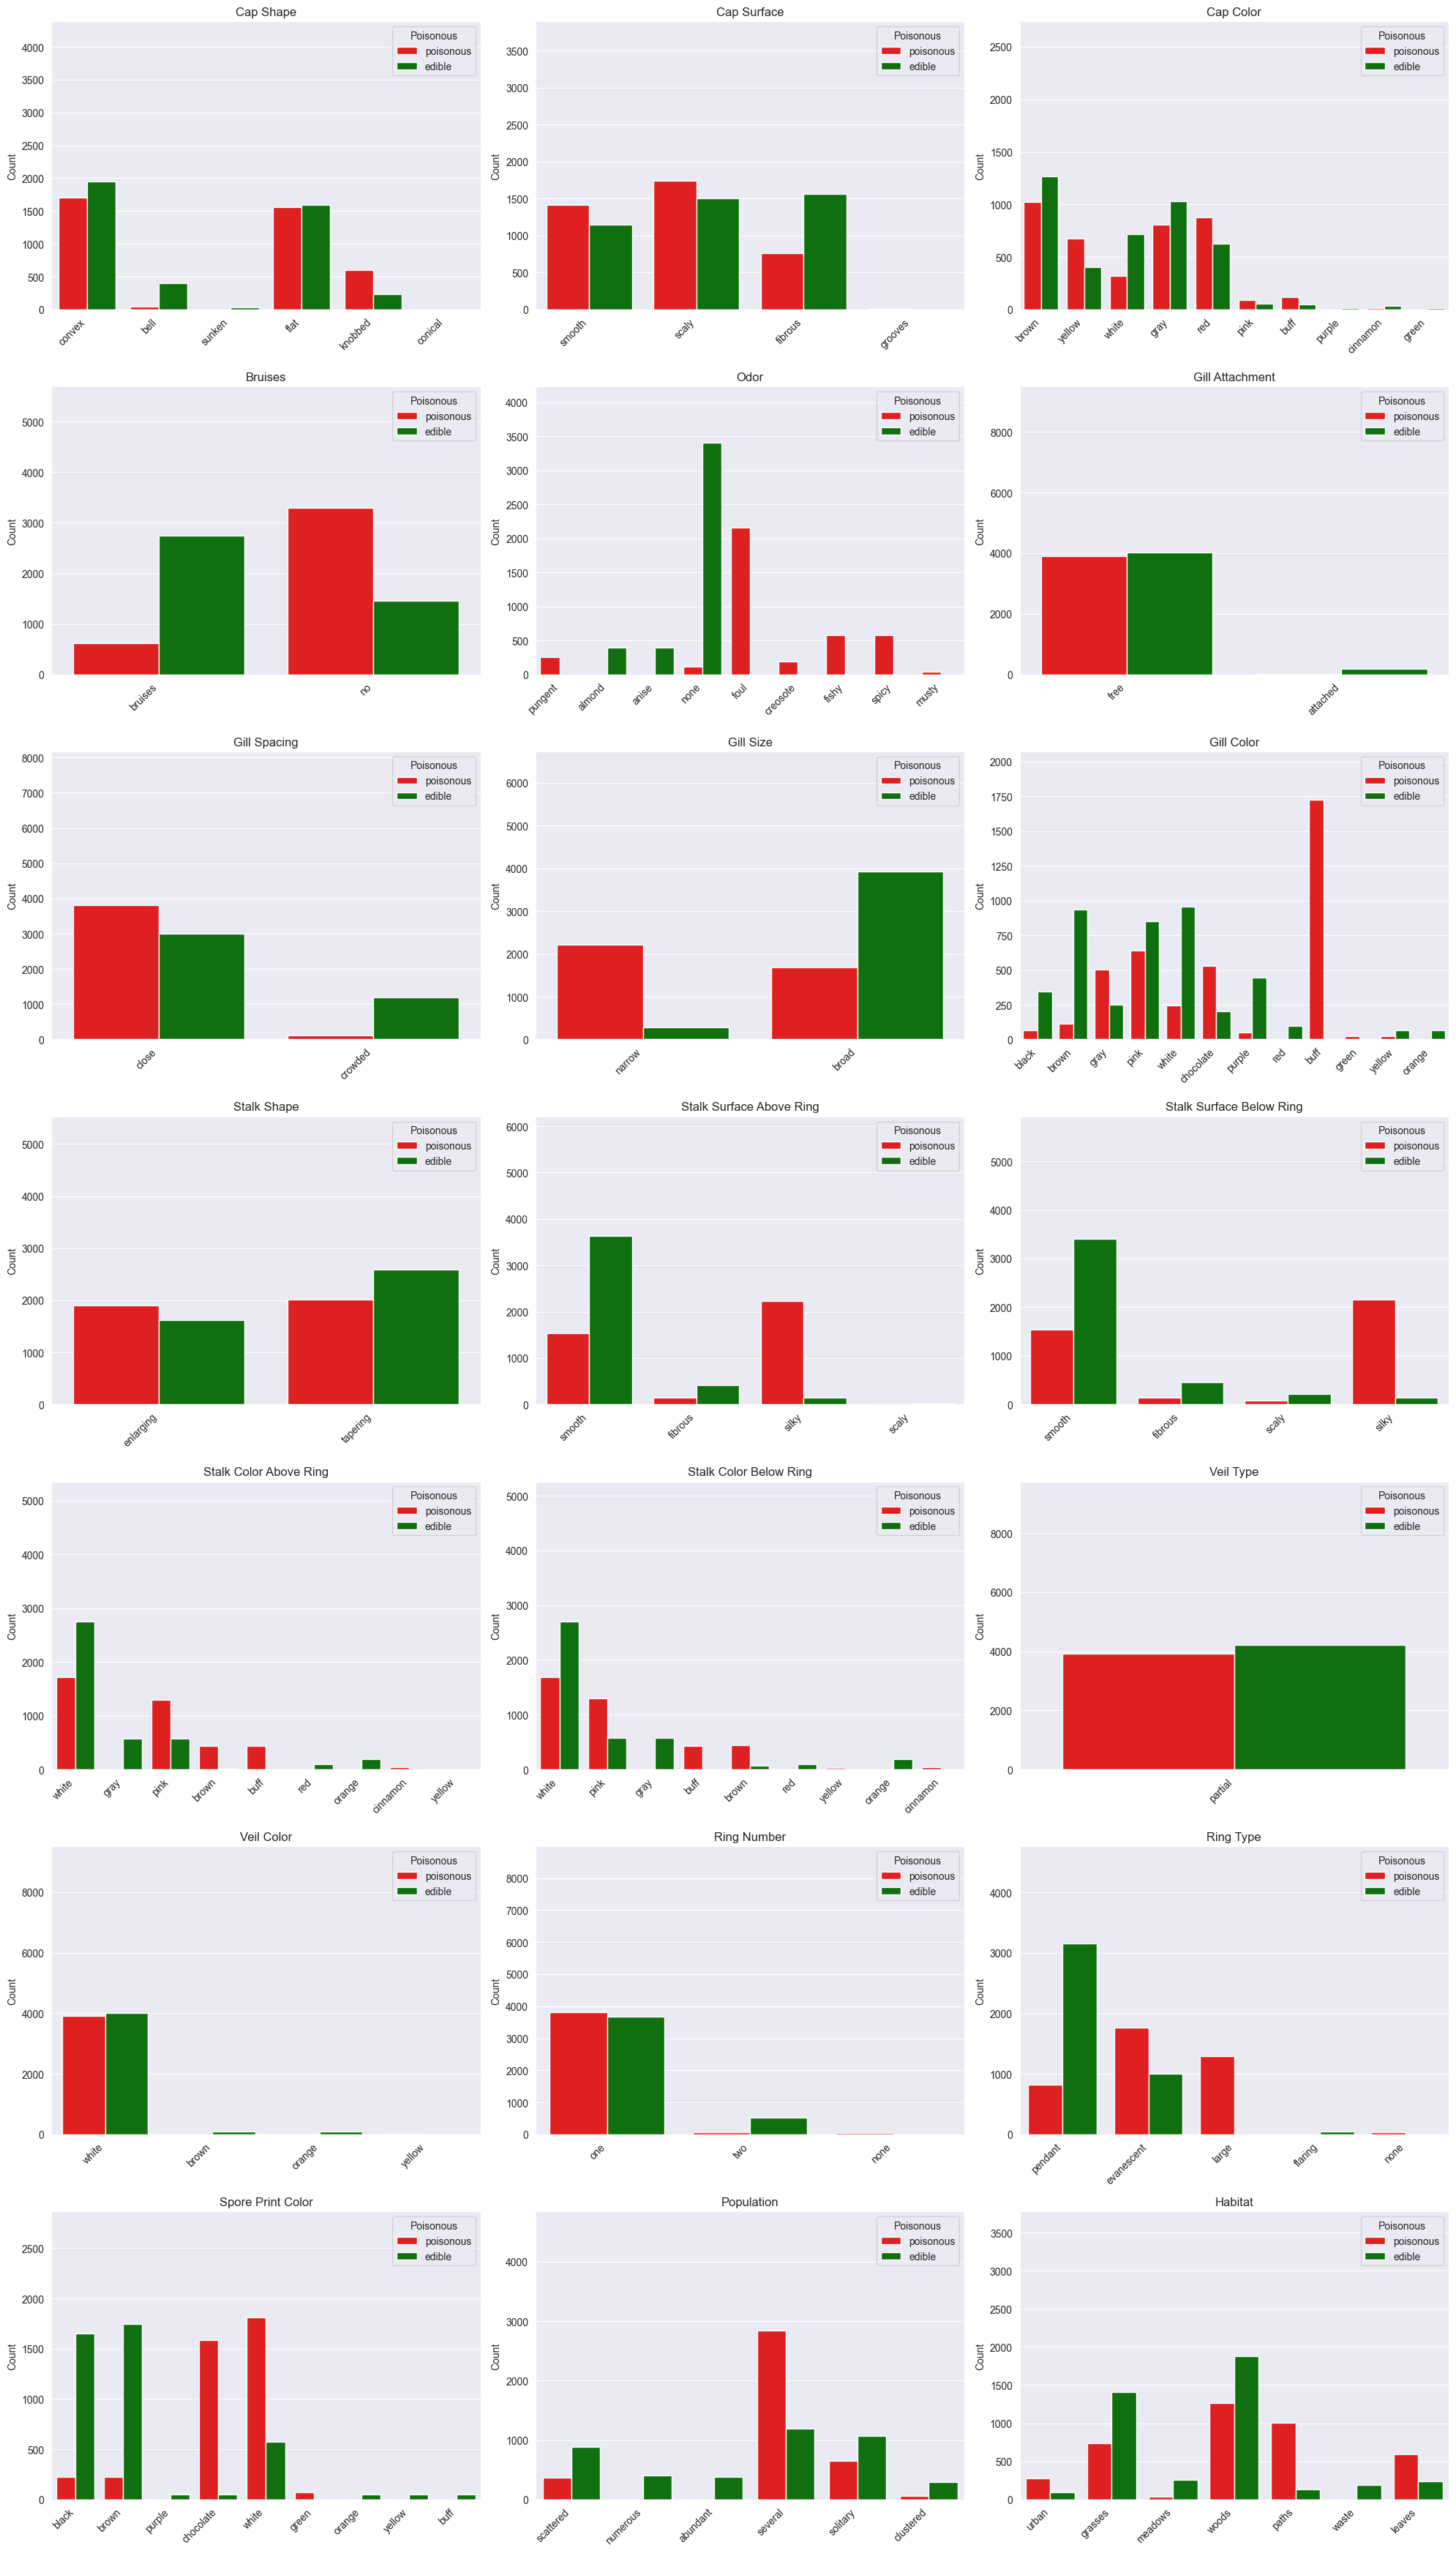

In [22]:
def plot_feature_distributions(df, target_column='poisonous'):
    # Get all feature columns except the target
    feature_columns = [col for col in df.columns if col != target_column]
    
    # Set up the plotting area
    n_features = len(feature_columns)
    n_cols = 3
    n_rows = (n_features - 1) // n_cols + 1
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()
    
    # Define color palette
    color_palette = {'poisonous': 'red', 'edible': 'green'}
    
    for i, feature in enumerate(feature_columns):
        # Create a temporary dataframe with full names
        temp_df = df.copy()
        temp_df[feature] = temp_df[feature].map(feature_name_mapping[feature])
        temp_df[target_column] = temp_df[target_column].map(feature_name_mapping[target_column])
        
        # Create a count plot with custom colors
        sns.countplot(x=feature, hue=target_column, data=temp_df, ax=axes[i], palette=color_palette)
        
        # Rotate x-axis labels if there are many categories
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        
        # Set labels
        axes[i].set_title(feature.replace('-', ' ').title())
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
        
        # Add legend to every plot
        axes[i].legend(title=target_column.capitalize(), loc='upper right')
        
        # Adjust layout to prevent legend from overlapping with bars
        axes[i].set_ylim(0, df[feature].value_counts().max() * 1.2)  # Increase y-axis limit by 20%
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Call the function with our mushroom dataset
plot_feature_distributions(df_mushrooms)

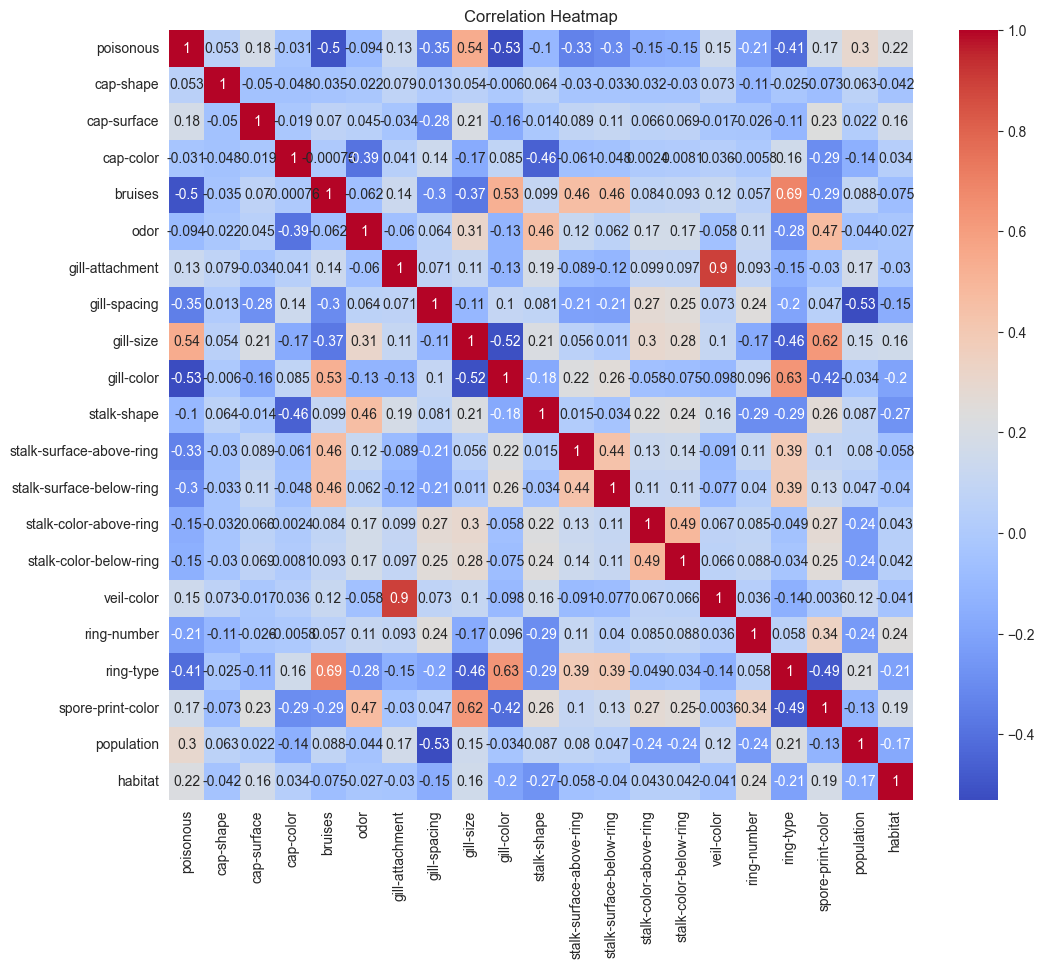

In [47]:
plt.figure(figsize=(12, 10))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [51]:
#1 = poisonous, 0 = edible, so the mean is the proportion
mean_value = encoded_df['poisonous'].mean()
print("Proportion Poisonous: ", mean_value)

Proportion Poisonous:  0.48202855736090594


In [49]:
encoded_df.corr()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
poisonous,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [52]:
correlation_matrix = encoded_df.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.89)]
print(to_drop)
encoded_df_reduced = encoded_df.drop(to_drop, axis=1)


['veil-color']


In [ ]:
# Create the pairplot
plt.figure(figsize=(120, 100))
sns.pairplot(encoded_df, hue='poisonous', palette={0: 'green', 1: 'red'}, 
             plot_kws={'alpha': 0.6}, diag_kind='hist')

plt.suptitle('Pairplot of Mushroom Features', y=1.02)


plt.tight_layout()
plt.show()

In [ ]:
plot_df = encoded_df[['cap-color', 'ring-number', 'poisonous']]

# Create the pairplot
plt.figure(figsize=(12, 10))  # Adjusted figure size for better visibility
sns.pairplot(plot_df, hue='poisonous', palette={0: 'green', 1: 'red'}, 
             plot_kws={'alpha': 0.6}, diag_kind='hist')

plt.suptitle('Pairplot of Mushroom Features', y=1.02)
plt.tight_layout()
plt.show()

In [58]:
X = encoded_df.drop(columns='poisonous')
y = pd.Series(encoded_df['poisonous'])
print(y) 

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: poisonous, Length: 8124, dtype: int64


In [59]:
print(X.shape[0])

8124


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [61]:
#Linear Discriminant Analysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1-accuracy

print("Predicted class labels:", y_pred)
print("Actual class labels:", y_test.values)

print("Prediction Accuracy: ", accuracy)
print("Prediction Error Rate: ", error_rate)

Predicted class labels: [1 0 0 ... 0 1 1]
Actual class labels: [1 0 0 ... 0 1 1]
Prediction Accuracy:  0.9372307692307692
Prediction Error Rate:  0.0627692307692308


In [62]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)

y_pred = qda.predict(X_test)

# Calculate the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1-accuracy

# Display the results
print("Predicted class labels:", y_pred)
print("Actual class labels:", y_test.values)
print("Prediction accuracy:", accuracy)
print("Error rate:", error_rate)

Predicted class labels: [1 0 0 ... 0 1 1]
Actual class labels: [1 0 0 ... 0 1 1]
Prediction accuracy: 0.9803076923076923
Error rate: 0.019692307692307676


In [80]:
accuracies = []
error_rates = []

# Iterate through 1 to 20 neighbors
for n in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    
    # Calculate the prediction accuracy
    accuracy = accuracy_score(y_test, knn_pred)
    error_rate = 1 - accuracy
    
    accuracies.append(accuracy)
    error_rates.append(error_rate)
    
    print(f'For {n} neighbors:')
    print(f'Prediction accuracy: {accuracy:.4f}')
    print(f'Error rate: {error_rate:.4f}\n')

# Find the best number of neighbors
best_n = np.argmax(accuracies) + 1
best_accuracy = max(accuracies)

print(f'Best number of neighbors: {best_n}')
print(f'Best accuracy: {best_accuracy:.4f}')

For 1 neighbors:
Prediction accuracy: 1.0000
Error rate: 0.0000

For 2 neighbors:
Prediction accuracy: 0.9957
Error rate: 0.0043

For 3 neighbors:
Prediction accuracy: 0.9951
Error rate: 0.0049

For 4 neighbors:
Prediction accuracy: 0.9957
Error rate: 0.0043

For 5 neighbors:
Prediction accuracy: 0.9957
Error rate: 0.0043

For 6 neighbors:
Prediction accuracy: 0.9957
Error rate: 0.0043

For 7 neighbors:
Prediction accuracy: 0.9938
Error rate: 0.0062

For 8 neighbors:
Prediction accuracy: 0.9938
Error rate: 0.0062

For 9 neighbors:
Prediction accuracy: 0.9932
Error rate: 0.0068

For 10 neighbors:
Prediction accuracy: 0.9932
Error rate: 0.0068

For 11 neighbors:
Prediction accuracy: 0.9926
Error rate: 0.0074

For 12 neighbors:
Prediction accuracy: 0.9908
Error rate: 0.0092

For 13 neighbors:
Prediction accuracy: 0.9908
Error rate: 0.0092

For 14 neighbors:
Prediction accuracy: 0.9902
Error rate: 0.0098

For 15 neighbors:
Prediction accuracy: 0.9908
Error rate: 0.0092

For 16 neighbors:
P

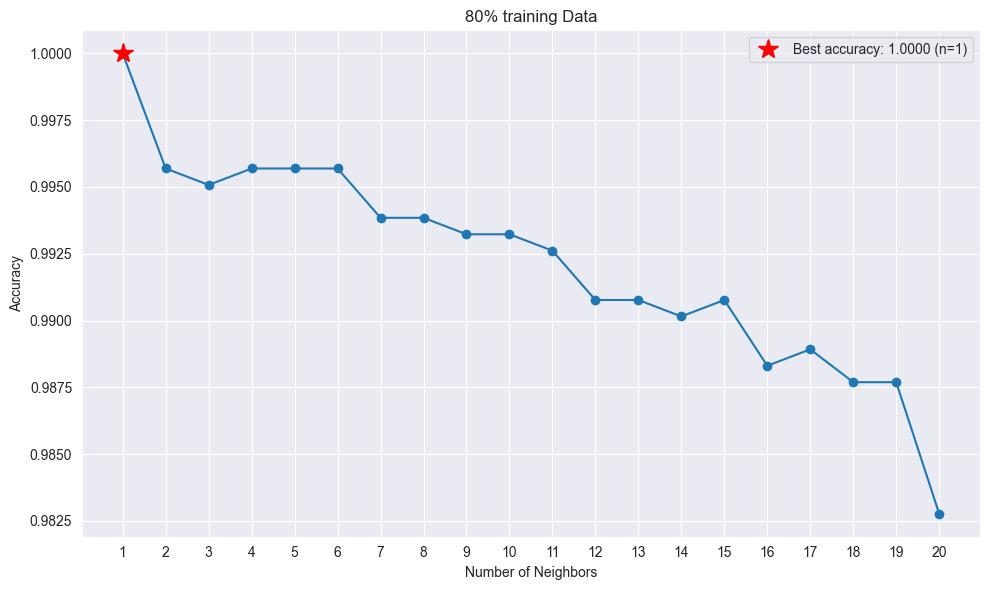

In [81]:
neighbors = range(1, 21)

plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracies, marker='o')
plt.title('80% training Data')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)

# Highlighting the best accuracy
best_accuracy = max(accuracies)
best_n = accuracies.index(best_accuracy) + 1
plt.plot(best_n, best_accuracy, 'r*', markersize=15, label=f'Best accuracy: {best_accuracy:.4f} (n={best_n})')

plt.legend()
plt.tight_layout()
plt.show()

In [82]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.9,random_state=11)

In [83]:
accuracies = []
error_rates = []

# Iterate through 1 to 20 neighbors
for n in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train1, y_train1)
    knn_pred = knn.predict(X_test1)
    
    # Calculate the prediction accuracy
    accuracy = accuracy_score(y_test1, knn_pred)
    error_rate = 1 - accuracy
    
    accuracies.append(accuracy)
    error_rates.append(error_rate)
    
    print(f'For {n} neighbors:')
    print(f'Prediction accuracy: {accuracy:.4f}')
    print(f'Error rate: {error_rate:.4f}\n')

# Find the best number of neighbors
best_n = np.argmax(accuracies) + 1
best_accuracy = max(accuracies)

print(f'Best number of neighbors: {best_n}')
print(f'Best accuracy: {best_accuracy:.4f}')

For 1 neighbors:
Prediction accuracy: 0.9835
Error rate: 0.0165

For 2 neighbors:
Prediction accuracy: 0.9706
Error rate: 0.0294

For 3 neighbors:
Prediction accuracy: 0.9740
Error rate: 0.0260

For 4 neighbors:
Prediction accuracy: 0.9616
Error rate: 0.0384

For 5 neighbors:
Prediction accuracy: 0.9672
Error rate: 0.0328

For 6 neighbors:
Prediction accuracy: 0.9551
Error rate: 0.0449

For 7 neighbors:
Prediction accuracy: 0.9582
Error rate: 0.0418

For 8 neighbors:
Prediction accuracy: 0.9443
Error rate: 0.0557

For 9 neighbors:
Prediction accuracy: 0.9472
Error rate: 0.0528

For 10 neighbors:
Prediction accuracy: 0.9386
Error rate: 0.0614

For 11 neighbors:
Prediction accuracy: 0.9397
Error rate: 0.0603

For 12 neighbors:
Prediction accuracy: 0.9335
Error rate: 0.0665

For 13 neighbors:
Prediction accuracy: 0.9334
Error rate: 0.0666

For 14 neighbors:
Prediction accuracy: 0.9307
Error rate: 0.0693

For 15 neighbors:
Prediction accuracy: 0.9297
Error rate: 0.0703

For 16 neighbors:
P

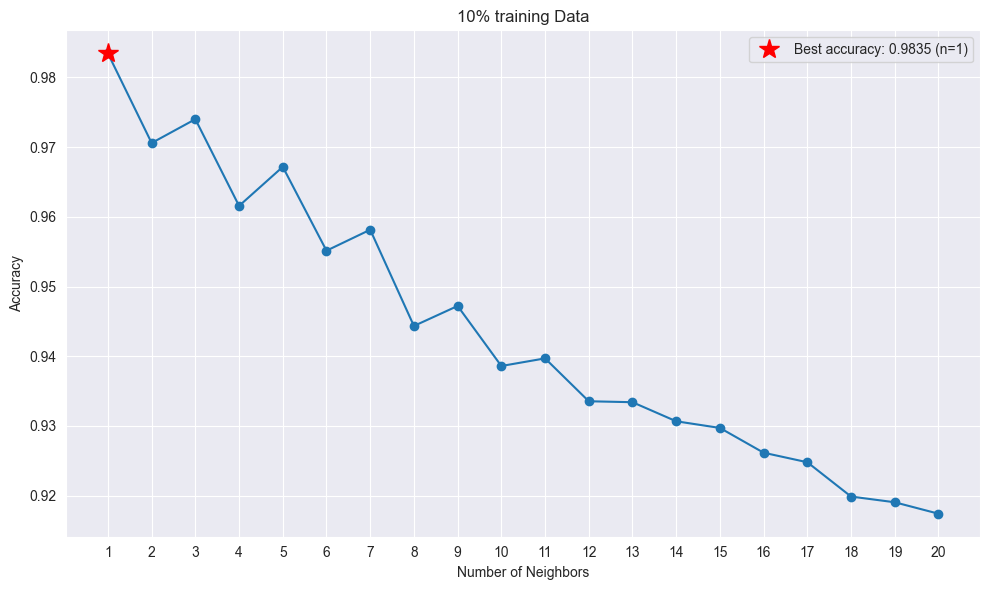

In [84]:
neighbors = range(1, 21)

plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracies, marker='o')
plt.title('10% training Data')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)

# Highlighting the best accuracy
best_accuracy = max(accuracies)
best_n = accuracies.index(best_accuracy) + 1
plt.plot(best_n, best_accuracy, 'r*', markersize=15, label=f'Best accuracy: {best_accuracy:.4f} (n={best_n})')

plt.legend()
plt.tight_layout()
plt.show()